![unnamed (1).png](<unnamed (1).png>)

# Analysing Customer Churn Data - Predicting Behavior to Retain Customers



Rayyan Minhaj (Data Science Intern - 10Pearls)

---

## Module 2: Model Selection, Training, Tuning, and Evaluation
Using a set of Machine Learning algorithms and evaluating their performance in order to give us better insight into predicting customer churn.

In [68]:
import pandas as pd

df = pd.read_csv('processed_churn_data.csv')
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,1,29.85,29.85,True,False,True,False,False,True,...,True,False,False,False,True,False,False,True,False,False
1,5575-GNVDE,34,56.95,1889.50,False,True,True,False,True,False,...,False,True,False,True,False,False,False,False,True,False
2,3668-QPYBK,2,53.85,108.15,False,True,True,False,True,False,...,True,False,False,False,True,False,False,False,True,True
3,7795-CFOCW,45,42.30,1840.75,False,True,True,False,True,False,...,False,True,False,True,False,True,False,False,False,False
4,9237-HQITU,2,70.70,151.65,True,False,True,False,True,False,...,True,False,False,False,True,False,False,True,False,True


In [75]:
df = df.map(lambda x: 1 if x is True else (0 if x is False else x))


In [55]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == True else 0)


In [76]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,1,29.85,29.85,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

metrics


{'Accuracy': 0.79478672985782,
 'Precision': 0.6361702127659574,
 'Recall': 0.5329768270944741,
 'F1 Score': 0.5800193986420951,
 'ROC-AUC': 0.8391694256198869}

Performing Cross-Validation and computing the evaluation metrics

In [87]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and compute evaluation metrics
cv_accuracy = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(log_reg, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(log_reg, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(log_reg, X, y, cv=5, scoring='f1')
cv_roc_auc = cross_val_score(log_reg, X, y, cv=5, scoring='roc_auc')

# Compile cross-validation results
cv_results = {
    'Accuracy': cv_accuracy.mean(),
    'Precision': cv_precision.mean(),
    'Recall': cv_recall.mean(),
    'F1 Score': cv_f1.mean(),
    'ROC AUC Score': cv_roc_auc.mean()
}


cv_results


{'Accuracy': 0.8020463623762917,
 'Precision': 0.6517482338999337,
 'Recall': 0.5478731487720606,
 'F1 Score': 0.5952347182663011,
 'ROC AUC Score': 0.8443283734369583}

Plotting the Confusion Matrix

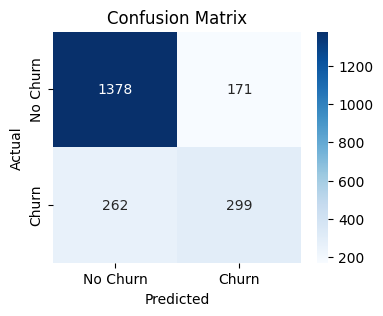

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The reason for Churn being classified as No Churn could be due to the class imbalances as seen from previous Module. There is an abundance of people who did not churn as opposed to people who did.

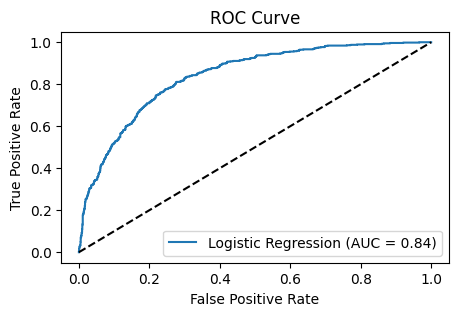

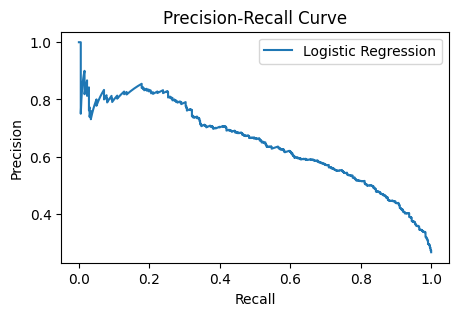

In [91]:
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


Generating Classification Report

In [89]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

class_report

'              precision    recall  f1-score   support\n\n    No Churn       0.84      0.89      0.86      1549\n       Churn       0.64      0.53      0.58       561\n\n    accuracy                           0.79      2110\n   macro avg       0.74      0.71      0.72      2110\nweighted avg       0.79      0.79      0.79      2110\n'